#### Numpy and Mathplotlib are useful Libraries provided by Python 

In [1]:
#Numpy and matplotlib are python library for 
#Numerical calculation and plotting
import numpy as np  
import matplotlib.pyplot as plt 

#### Task-1-Part-1

In [2]:
## Explain Transition Matrix
#Numpy array create the number of rows and column
state = np.array(['Idle', 'Working', 'Broken', 'Repair'])
print('The four state of Machine: ', state,'\n')
#let's assume A variable to store the transitions Matrix 
A = np.array([[0.05, 0.1, 0.0, 0.5],  
              [0.93, 0.86, 0.0, 0.1],
              [0.02, 0.04, 0.8, 0.0],
              [0.0, 0.0, 0.2, 0.4]])
#This statement for print above array 
print('The transition matrix A :\n', A, '\n')  
#shape & dimension check  
print('The shape of transition Matrix A is:', A.shape, ' & no of dimension is ', A.ndim, '- D')  

The four state of Machine:  ['Idle' 'Working' 'Broken' 'Repair'] 

The transition matrix A :
 [[0.05 0.1  0.   0.5 ]
 [0.93 0.86 0.   0.1 ]
 [0.02 0.04 0.8  0.  ]
 [0.   0.   0.2  0.4 ]] 

The shape of transition Matrix A is: (4, 4)  & no of dimension is  2 - D


#### Task-1-Part-2 

In [3]:
#200 machine are initially working on state, rest of the other machine are in zero state 
# new matrix denote B
B= np.array([0, 200, 0, 0])
print(B)
#Shape & dimensions of matrix
print('The shape of matrix B is:', B.shape, ' & the dimensions is:', B.ndim, '-D')
B = np.resize(B,(4,1))  #Numpy resize changes dimensions 
print(B)
print('The shape of matrix B is:', B.shape, ' & the dimensions is:', B.ndim, '-D')
#Converting array into [] list for easy
output = [B]    
print(type(output)) 

# state of machine for in 24 hours using for loop 
for i in range (24):  
    B = np.matmul(A,B)                     # @ or numpy.matmul matrix multiplication
    output.append(B)                #append() add item at end continuously

# Converting list [] to a NumPy ([]) for easy to display data plot
final_output = np.array(output) 
print(final_output.ndim)           
print(final_output.shape)            
hours = np.arange(25)  # 0 through 24 hours


[  0 200   0   0]
The shape of matrix B is: (4,)  & the dimensions is: 1 -D
[[  0]
 [200]
 [  0]
 [  0]]
The shape of matrix B is: (4, 1)  & the dimensions is: 2 -D
<class 'list'>
3
(25, 4, 1)


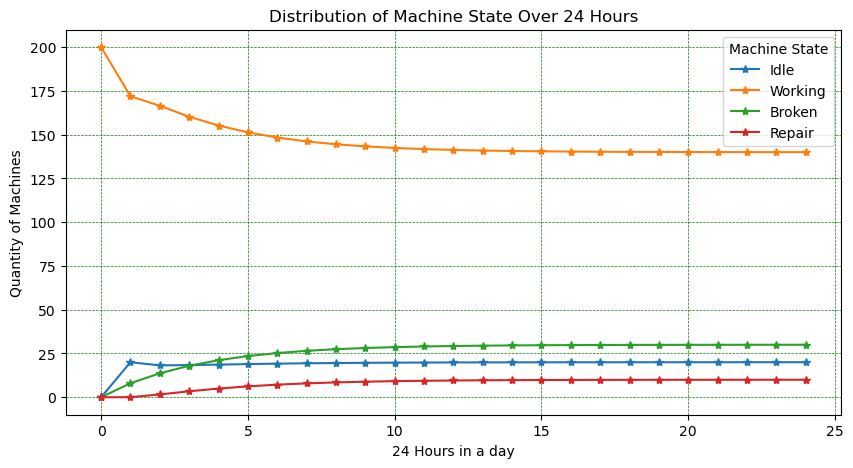

In [4]:
#Implenting feature provided by python matplotlib library
plt.figure(figsize=(10,5))  
#Ploting final output in the plot
plt.plot(hours, final_output[:, 0], label='Idle', marker='*') #marker is for easy view of every point
plt.plot(hours, final_output[:, 1], label='Working', marker='*')
plt.plot(hours, final_output[:, 2], label='Broken', marker='*')
plt.plot(hours, final_output[:, 3], label='Repair', marker='*')
#all sate of machine on small box
plt.legend(title='Machine State') 
#xlabel & ylabel allows to add x-axis and y-axis
plt.xlabel("24 Hours in a day") 
plt.ylabel("Quantity of Machines")
#Title to give the name of plot 
plt.title("Distribution of Machine State Over 24 Hours")
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5) #grid show box inside plot


##### Code to calculate the egeince vector of Transition Matrix A & Steady state of machine

In [5]:
#Using the helps of above matrix A
#Eigen value V and eigen vector P calculate using linalg.eig 
V, P = np.linalg.eig(A)             
print('The Egience vector of T matrix A : \n', P, '\n')

# egience vector P of transition matrix A & 
# Egience value V and 1 represent the long run steady state
steady_state = P[:, np.isclose(V, 1)].reshape(-1)            
steady_state = steady_state / steady_state.sum()  #steady state for one state
print('Steady State vector at each state of machine :', steady_state) 


The Egience vector of T matrix A : 
 [[ 0.70224021 -0.13801311  0.0841534   0.33700315]
 [-0.71170273 -0.96609178 -0.83353499 -0.83629975]
 [ 0.01683788 -0.20701967  0.46783381  0.07303705]
 [-0.00737535 -0.06900656  0.28154778  0.42625955]] 

Steady State vector at each state of machine : [0.1  0.7  0.15 0.05]


#### Task-1-Part-3-A (Above A matrix modifications to create New T Matrix)

In [6]:
#new modified matrix based on above part 1 T Matrix 
#when ideal state is switched off matrix becomes
new_A = np.array([[1.0, 0.0, 0.0, 0.0],
                  [0.93, 0.86, 0.0, 0.1],
                  [0.02, 0.04, 0.8, 0.0],
                  [0.0, 0.0, 0.2, 0.4]])
print('Modified transition matrix New_A : \n', new_A, '\n')
#Steady state vector of 200 machine when machine was in zero state 
#From part 2 machine each steady state was [0.1 0.7 0.15 0.05]
first_state = 200*steady_state 
print('On initial state machine state was :', first_state) 

#After implementing new policy estimate number of hours >= 20 Working machines.
#states over time in list form
time_state = [first_state]
hours = 0
# Simulate until >= 20 machines Working
# 1 refers to the state of machine working
for i in range(first_state[1] >= 20):
    first_state = new_A @ first_state   #@ matrix multiplication 
    time_state.append(first_state)  #adding item at end of the first state
    hours +=1
#Changing list into Array 
new_time_state = np.array(time_state)
print('The machine state become less then 20 : \n', new_time_state)
print('Estimated hours >= 20 Working machines :', hours) 


Modified transition matrix New_A : 
 [[1.   0.   0.   0.  ]
 [0.93 0.86 0.   0.1 ]
 [0.02 0.04 0.8  0.  ]
 [0.   0.   0.2  0.4 ]] 

On initial state machine state was : [ 20. 140.  30.  10.]
The machine state become less then 20 : 
 [[ 20. 140.  30.  10.]
 [ 20. 140.  30.  10.]]
Estimated hours >= 20 Working machines : 1


C:\Users\acer\AppData\Local\Temp\ipykernel_21588\3694661332.py:19: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  for i in range(first_state[1] >= 20):


#### Task-1-Part-3-B 

In [7]:
#Modified transition matrix excluding the Idle state row and column
N = new_A[1:, 1:]        
print('New (3*3) matrix after eliminating first row and first column : \n', N)
print('\n')

# 3x3 identity matrix
I = np.eye(N.shape[0])
print('The Identity matrix I : \n', I)
print('\n')
 
#linalg.inv() calculate the inverse matrix
expected_time_matrix = np.linalg.inv(I - N)
# Sum of each column gives the expected time to reach Idle from each state
expected_times = expected_time_matrix.sum(axis=0)
print("Expected times to reach Idle from each state (Working, Broken, Repair):", expected_times)

New (3*3) matrix after eliminating first row and first column : 
 [[0.86 0.   0.1 ]
 [0.04 0.8  0.  ]
 [0.   0.2  0.4 ]]


The Identity matrix I : 
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


Expected times to reach Idle from each state (Working, Broken, Repair): [9.5  8.25 3.25]


### Egience-face 

#### Task-2-Part-1

The shape of Xall : (4096, 400)
The minimum value of Xall is : 0.0  & maximum value is : 1.0
The shape of Xsub is (4096, 200)


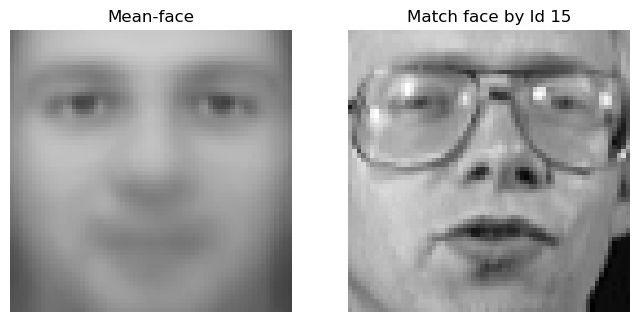

In [8]:
#Importing dataset povided by scikit learn 
import sklearn.datasets 
#from scikit learn olivetti-face datasets is fetch to analyze
faces = sklearn.datasets.fetch_olivetti_faces() 
Xall = faces.data.T 
print('The shape of Xall :', Xall.shape)  #shape
print('The minimum value of Xall is :', Xall.min(), ' & maximum value is :', Xall.max())   
Xsub = Xall[:,0:200]  
print("The shape of Xsub is", Xsub.shape)
# mean of each row in Xsub & reshaping to convert 4096x1 shape
xbar = np.mean(Xsub, axis=1).reshape(4096, 1)   
# Reshaping xbar to (64, 64) to visualize the "mean face"
mean_face = xbar.reshape(64, 64)  

fig, axes = plt.subplots(1, 2, figsize=(8, 4)) 
axes[0].imshow(mean_face, cmap=plt.cm.gray, vmin=0, vmax=1) #given in scenario
axes[0].set_title("Mean-face") #title plot
axes[0].axis("off") #x-label & y-label off

#My student Id = 15415815
my_student_id = 15 
# Get the specific face corresponding to last two digits of Student ID
specific_face = Xsub[:, my_student_id].reshape(64, 64)
# Plot the specific face 
axes[1].imshow(specific_face, cmap=plt.cm.gray)
axes[1].set_title(f"Match face by Id {my_student_id}")
axes[1].axis("off")
plt.show()

#### Task-2-part-2

The covariance of Matrix C is: 
  [[ 0.02923626  0.02777696  0.02361838 ... -0.0050015  -0.00532194
  -0.00436173]
 [ 0.02777696  0.03035756  0.02787726 ... -0.00783738 -0.00766186
  -0.00668278]
 [ 0.02361838  0.02787726  0.03057081 ... -0.01107125 -0.0097471
  -0.00878784]
 ...
 [-0.0050015  -0.00783738 -0.01107125 ...  0.03501027  0.02976429
   0.02706939]
 [-0.00532194 -0.00766186 -0.0097471  ...  0.02976429  0.03106445
   0.02862208]
 [-0.00436173 -0.00668278 -0.00878784 ...  0.02706939  0.02862208
   0.02857759]] 

Matrix is Orthogonal and Identity matrix


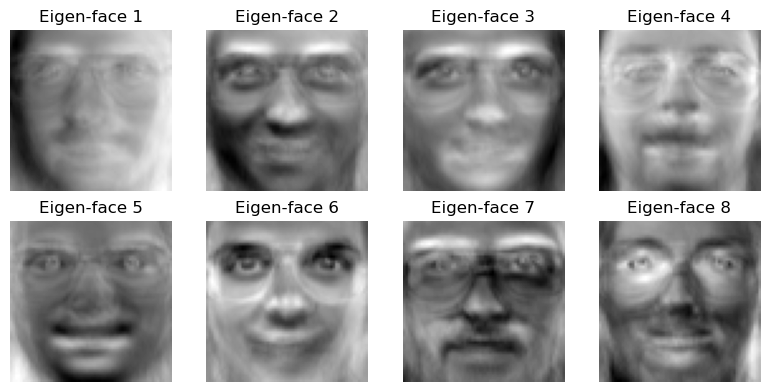

In [9]:
# numpy .cov help calculate covariance C
C = np.cov(Xsub)
print('The covariance of Matrix C is: \n ', C, '\n')

#linalg.eigh allows to calculate eigen values (V) & vectors (P) using covariance C
V, P = np.linalg.eigh(C)
#Reverse the entries in V and the columns of P to order eigenvalues in descending order
V = V[::-1]   #reversing by ::-1
P = P[:, ::-1] 

# An orthogonal matrix P should satisfy matrix dot product and eye checks identity matrix
orthogonal_check = np.allclose(np.dot(P.T, P), np.eye(P.shape[1]))
if(orthogonal_check == True):
    print('Matrix is Orthogonal and Identity matrix')
else:
    print('Matrix is not Orthogonal and not Identity matrix')
#eigenfaces corresponding to the 8 largest eigenvalues
fig, axes = plt.subplots(2, 4, figsize=(8, 4))
axes = axes.ravel()
for i in range(8):
    # Reshaping each eigenvector to a 64x64 image to check as an eigenface
    eigenface = P[:, i].reshape(64,64)
    axes[i].imshow(eigenface, cmap=plt.cm.gray)
    axes[i].set_title(f"Eigen-face {i+1}")
    axes[i].axis("off")
plt.tight_layout()
plt.show()


#### Task-2-part-3-1

[[ 1.54130153e+00 -6.31114957e+00  3.61186438e-01 ...  3.26492629e+00
   4.13108444e+00 -4.75569193e+00]
 [-4.57309371e+00 -2.15624562e+00 -3.36405121e+00 ...  1.37235858e+00
   1.39585736e-01  3.35510024e+00]
 [ 1.20998345e+00  4.09755579e+00  2.35701773e+00 ... -1.12233964e+00
  -6.39963205e-01 -4.30977740e+00]
 ...
 [-1.18838814e-07 -1.16542932e-07 -1.18214981e-07 ... -1.18850430e-07
  -1.18918217e-07 -1.18849345e-07]
 [-1.12278650e-08 -2.14808633e-08 -1.45859523e-08 ... -1.18857630e-08
  -1.32325638e-08 -1.22494504e-08]
 [ 1.45212446e-07  1.45812354e-07  1.46099466e-07 ...  1.46422509e-07
   1.44272670e-07  1.46234289e-07]] 

[ 1.54130153e+00 -4.57309371e+00  1.20998345e+00 ... -1.18838814e-07
 -1.12278650e-08  1.45212446e-07]
[0.30991736 0.36776859 0.41735536 ... 0.15289256 0.16115703 0.1570248 ]
[[0.30991736 0.3677686  0.41735536 ... 0.37190083 0.3305785  0.30578512]
 [0.3429752  0.40495867 0.43801653 ... 0.37190083 0.338843   0.3140496 ]
 [0.3429752  0.41735536 0.45041323 ... 0.

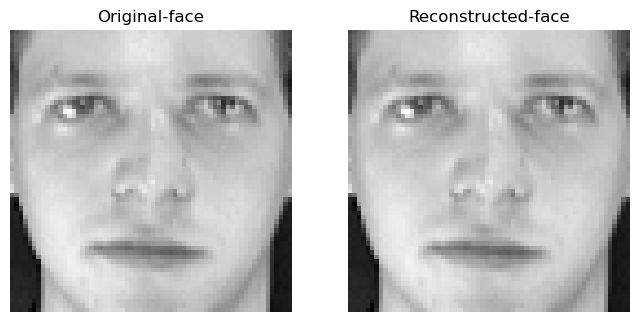


 Is the reconstruction accurate?  True


In [10]:
Ysub = P.T@(Xsub - xbar) #@ Transpose eigen vector with matrix multipication 
print(Ysub, '\n')
# column y from Ysub (e.g., the first column) to demonstrate reconstruction
y = Ysub[:, 0]
print(y)
# Reconstruct the corresponding column in Xsub
face_reconstructed = (P @ y) + xbar.flatten()
print(face_reconstructed)
# Reshape for visualization
face_original = Xsub[:, 0].reshape(64, 64)
face_image_reconstructed = face_original.reshape(64, 64)
print(face_image_reconstructed)

# Plot the original and reconstructed face to compare
fig, axes = plt.subplots(1, 2, figsize=(8, 4))  
axes[0].imshow(face_original, cmap=plt.cm.gray)  #display image
axes[0].set_title("Original-face")
axes[0].axis("off")
axes[1].imshow(face_image_reconstructed, cmap=plt.cm.gray)
axes[1].set_title("Reconstructed-face")
axes[1].axis("off")
plt.show()

# Reconstruction verification with original face 
reconstruction_error = np.allclose(Xsub[:, 0], face_reconstructed)
print("\n Is the reconstruction accurate? ", reconstruction_error)

#### Task-2-part-3-2

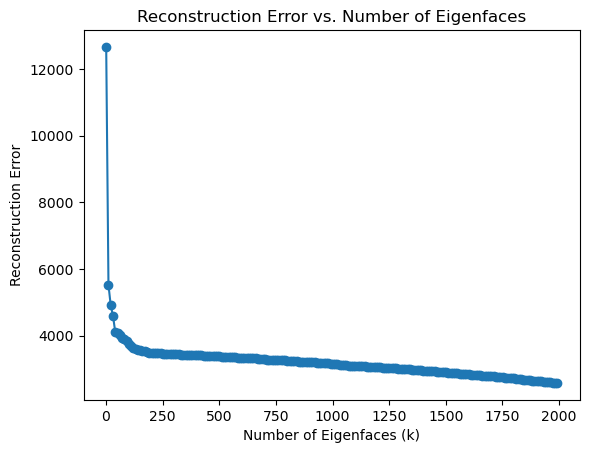

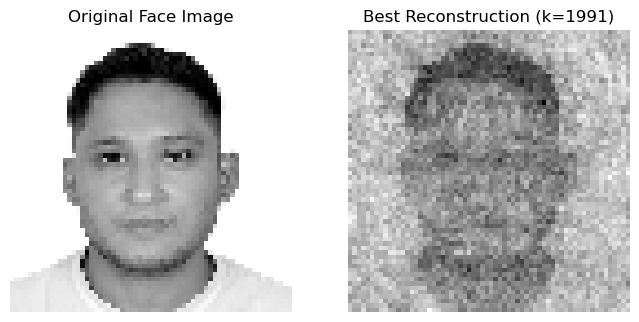

In [11]:
# own face image resize and gray scale from PIGM tools
image_me = plt.imread("pradeep_face.PGM") 
image_me = image_me.flatten()  # Flatten the 2D array to a 4096x1 vector
image_me = image_me.reshape(4096, 1)  # Ensure it’s in column vector form
# Center your face image by subtracting the mean face
y_me = P.T @ (image_me - xbar)
# Define values of k for the partial reconstruction
k_values = list(range(1, 2000, 10))  # Try different numbers of eigenfaces
errors = []
# Partial reconstructions using the first k eigenfaces
for k in k_values:
    # Reconstruct the image using only the first k eigenfaces
    partial_reconstruction = (P[:, :k] @ y_me[:k]) + xbar
    #reconstruction error (goodness of fit) using the Frobenius norm
    error = np.linalg.norm(image_me - partial_reconstruction)
    errors.append(error)
# Plot the reconstruction error as a function of k
plt.plot(k_values, errors, marker='o')
plt.xlabel("Number of Eigenfaces (k)")
plt.ylabel("Reconstruction Error")
plt.title("Reconstruction Error vs. Number of Eigenfaces")
plt.show()

# best partial reconstruction using the largest k value
best_k = k_values[-1]
best_reconstruction = (P[:, :best_k] @ y_me[:best_k]) + xbar
best_reconstruction_image = best_reconstruction.reshape(64, 64)

# Plot the original and best reconstruction images
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
axes[0].imshow(image_me.reshape(64, 64), cmap=plt.cm.gray)
axes[0].set_title("Original Face Image")
axes[0].axis("off")
axes[1].imshow(best_reconstruction_image, cmap=plt.cm.gray)
axes[1].set_title(f"Best Reconstruction (k={best_k})")
axes[1].axis("off")
plt.show()

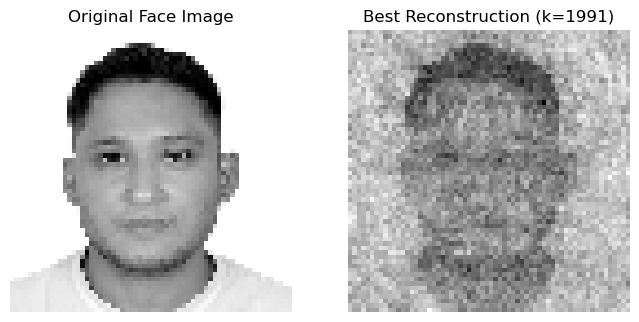

In [12]:
# best partial reconstruction using the largest k value
best_k = k_values[-1]
best_reconstruction = (P[:, :best_k] @ y_me[:best_k]) + xbar
best_reconstruction_image = best_reconstruction.reshape(64, 64)

# Plot the original and best reconstruction images
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
axes[0].imshow(image_me.reshape(64, 64), cmap=plt.cm.gray)
axes[0].set_title("Original Face Image")
axes[0].axis("off")

axes[1].imshow(best_reconstruction_image, cmap=plt.cm.gray)
axes[1].set_title(f"Best Reconstruction (k={best_k})")
axes[1].axis("off")
plt.show()